<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

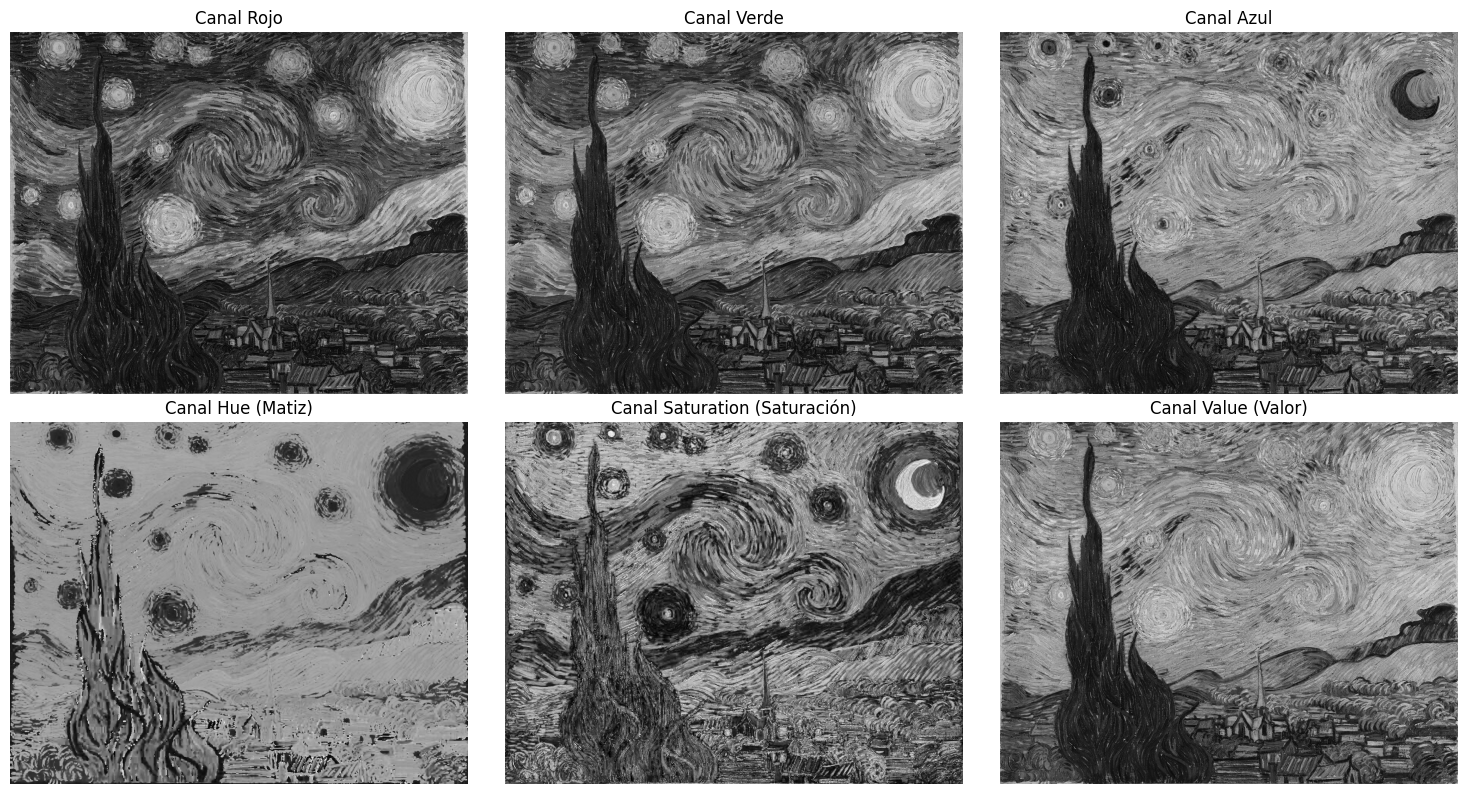

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color (BGR)
image_path = "/content/VanGogh.jpg"  # Cambia por tu ruta de imagen
img_bgr = cv2.imread(image_path)

# Verificar que la imagen se haya cargado correctamente
if img_bgr is None:
    print("Error al cargar la imagen")
    exit()

# Convertir BGR a RGB
imagesto_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Separar canales RGB
r, g, b = cv2.split(imagesto_rgb)

# Convertir BGR a HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Separar canales HSV
h, s, v = cv2.split(img_hsv)

# Configurar los subplots
plt.figure(figsize=(15, 8))

# Mostrar canales RGB
plt.subplot(2, 3, 1)
plt.imshow(r, cmap='gray')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Canal Azul')
plt.axis('off')

# Mostrar canales HSV
plt.subplot(2, 3, 4)
plt.imshow(h, cmap='gray')
plt.title('Canal Hue (Matiz)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(s, cmap='gray')
plt.title('Canal Saturation (Saturación)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(v, cmap='gray')
plt.title('Canal Value (Valor)')
plt.axis('off')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

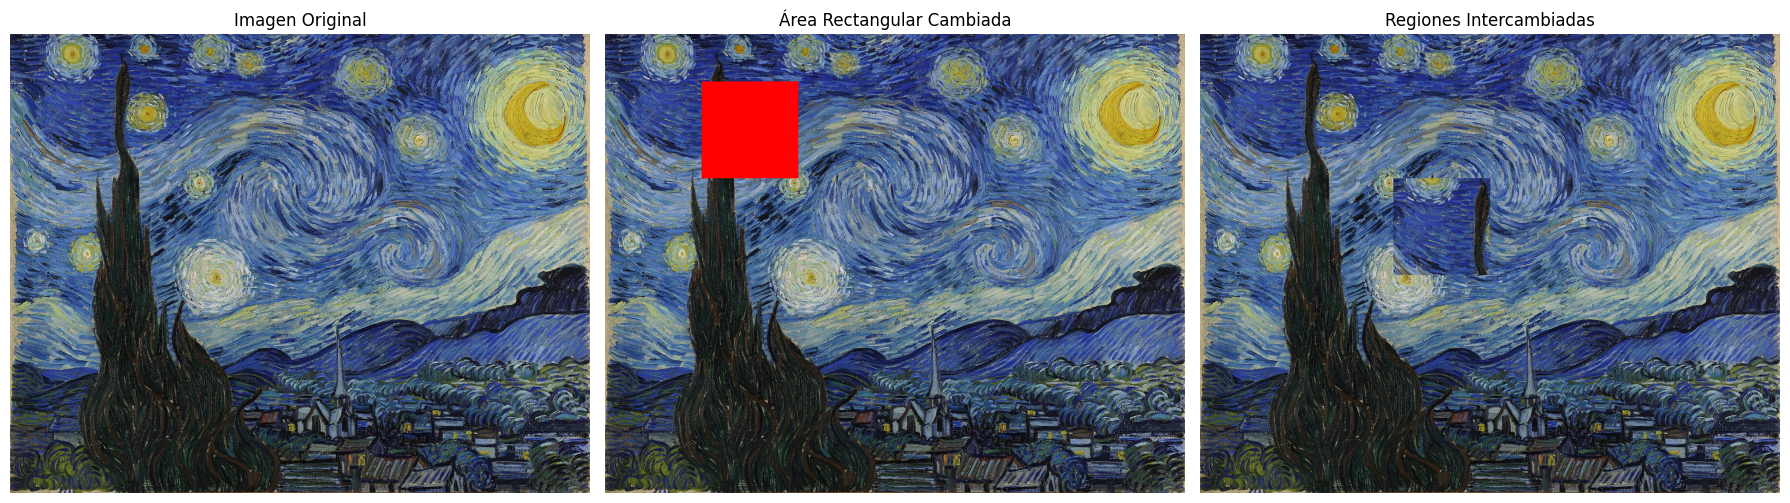

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen original
image_path = "/content/VanGogh.jpg"
img_bgr = cv2.imread(image_path)
img_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convertimos a RGB para matplotlib

# ---------------------------
# 1. Cambiar color de área rectangular
# ---------------------------
img_modificada = img_original.copy()

# Definir región rectangular (y1:y2, x1:x2)
roi = img_modificada[100:300, 200:400]  # Ajusta estas coordenadas según tu imagen

# Cambiar color a rojo (en RGB)
roi[:] = [255, 0, 0]  # Formato RGB (rojo completo)

# ---------------------------
# 2. Sustituir región por otra parte de la imagen
# ---------------------------
img_intercambio = img_original.copy()

# Definir regiones origen y destino (mismo tamaño)
origen = img_intercambio[50:250, 50:250]  # Región a copiar
destino = img_intercambio[300:500, 400:600]  # Región a remplazar

# Realizar el intercambio
destino[:] = origen

# ---------------------------
# Mostrar resultados
# ---------------------------
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(img_original)
plt.title('Imagen Original')
plt.axis('off')

# Modificación de color
plt.subplot(1, 3, 2)
plt.imshow(img_modificada)
plt.title('Área Rectangular Cambiada')
plt.axis('off')

# Intercambio de regiones
plt.subplot(1, 3, 3)
plt.imshow(img_intercambio)
plt.title('Regiones Intercambiadas')
plt.axis('off')

plt.tight_layout()
plt.show()

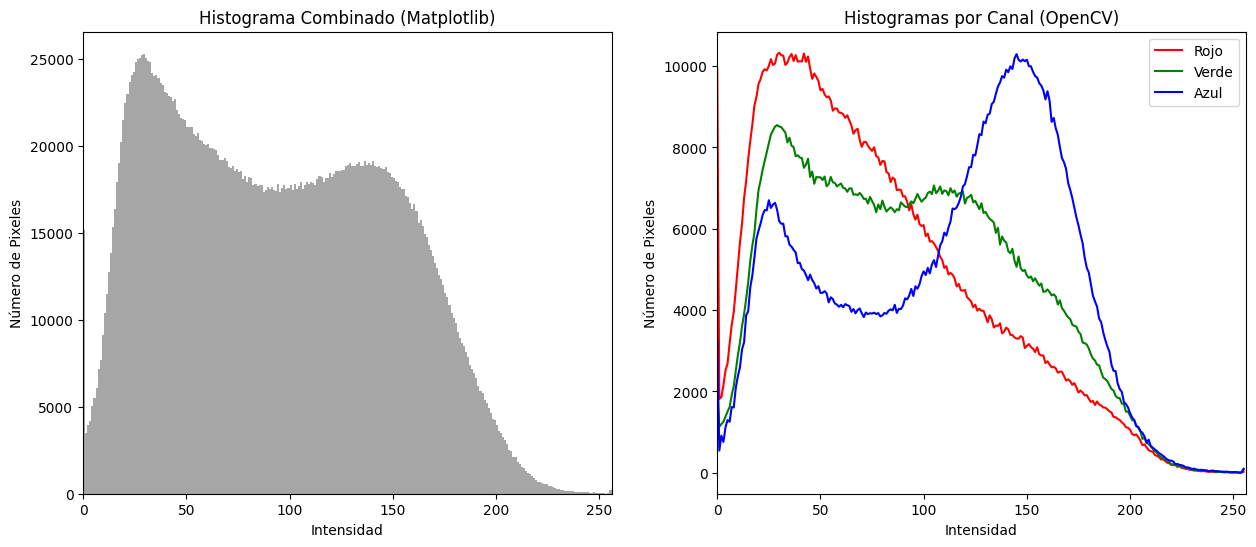

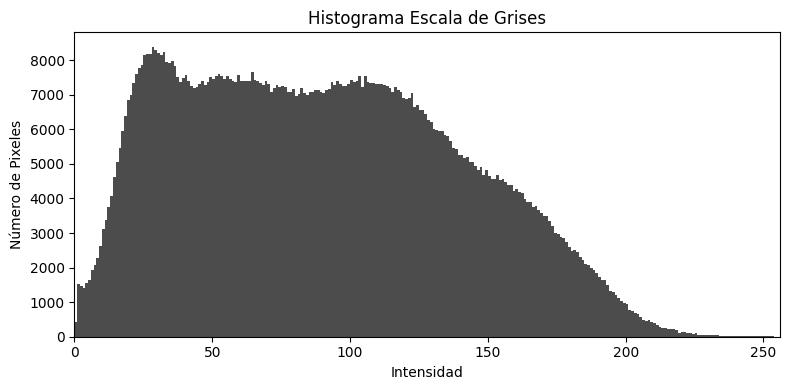

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a RGB (como en código anterior)
image_path = "/content/VanGogh.jpg"
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Crear figura para los histogramas
plt.figure(figsize=(15, 6))

# ---------------------------
# 1. Histograma con matplotlib (RGB combinado)
# ---------------------------
plt.subplot(1, 2, 1)
# Aplanar los canales y plotear
plt.hist(img_rgb.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histograma Combinado (Matplotlib)')
plt.xlabel('Intensidad')
plt.ylabel('Número de Pixeles')
plt.xlim([0, 256])

# ---------------------------
# 2. Histogramas por canal con OpenCV (RGB separado)
# ---------------------------
plt.subplot(1, 2, 2)
colors = ('r', 'g', 'b')
labels = ('Rojo', 'Verde', 'Azul')

for i, color in enumerate(colors):
    # Calcular histograma para cada canal
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=labels[i])

plt.title('Histogramas por Canal (OpenCV)')
plt.xlabel('Intensidad')
plt.ylabel('Número de Pixeles')
plt.xlim([0, 256])
plt.legend()

# ---------------------------
# 3. Histograma en escala de grises (alternativa)
# ---------------------------
# Convertir a grises
gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Crear nueva figura
plt.figure(figsize=(8, 4))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title('Histograma Escala de Grises')
plt.xlabel('Intensidad')
plt.ylabel('Número de Pixeles')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

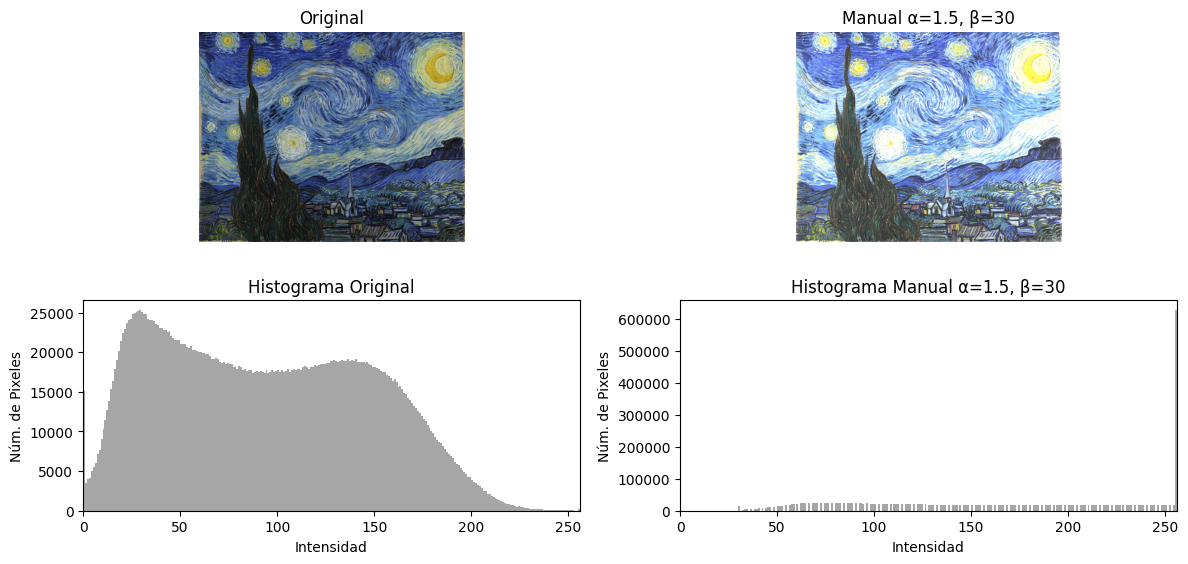

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para ajuste manual de brillo y contraste
def adjust_manual(img, alpha=1.0, beta=0):
    # alpha: factor de contraste, beta: suma de brillo
    new_img = cv2.convertScaleAbs(img * alpha + beta)
    return new_img



# Cargar imagen y convertir a RGB
def load_image(path):
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"No se encontró la imagen en {path}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

# Visualizar imagen y su histograma

def plot_image_and_hist(img, title, pos, total_plots):
    plt.subplot(total_plots[0], total_plots[1], pos)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

    # Histograma combinado
    plt.subplot(total_plots[0], total_plots[1], pos + total_plots[1])
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title(f'Histograma {title}')
    plt.xlabel('Intensidad')
    plt.ylabel('Núm. de Pixeles')
    plt.xlim([0, 256])

# Ruta de la imagen
image_path = "/content/VanGogh.jpg"
img = load_image(image_path)

# Parámetros de ajuste
alpha = 1.5  # Contraste
beta = 30    # Brillo

# Ajuste manual (ecuación)
img_manual = adjust_manual(img, alpha, beta)

# Ajuste con OpenCV
img_cv = adjust_opencv(img, alpha, beta)

# Gráfica comparativa
plt.figure(figsize=(12, 8))
plot_image_and_hist(img, 'Original', pos=1, total_plots=(3, 2))
plot_image_and_hist(img_manual, f'Manual α={alpha}, β={beta}', pos=2, total_plots=(3, 2))

plt.tight_layout()
plt.show()
